In [1]:
import pandas as pd

fake_df = pd.read_csv('Fake.csv')
true_df = pd.read_csv('True.csv')

fake_df['label'] = 0
true_df['label'] = 1

df = pd.concat([fake_df, true_df])

In [2]:
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [3]:
df.tail()

,title,text,subject,date,label
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [4]:
print(df.columns)

print('\nMissing Values:\n',df.isnull().sum())

print('\nDuplicate Values:',df.duplicated().sum())

df.drop_duplicates(inplace=True)

#Class distribution

print("\nClass distribution:\n", df['label'].value_counts())

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

Missing Values:
 title      0
text       0
subject    0
date       0
label      0
dtype: int64

Duplicate Values: 209

Class distribution:
 label
0    23478
1    21211
Name: count, dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44689 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44689 non-null  object
 1   text     44689 non-null  object
 2   subject  44689 non-null  object
 3   date     44689 non-null  object
 4   label    44689 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.0+ MB


In [6]:
df['label'].value_counts()

,count
label,
0,23478
1,21211


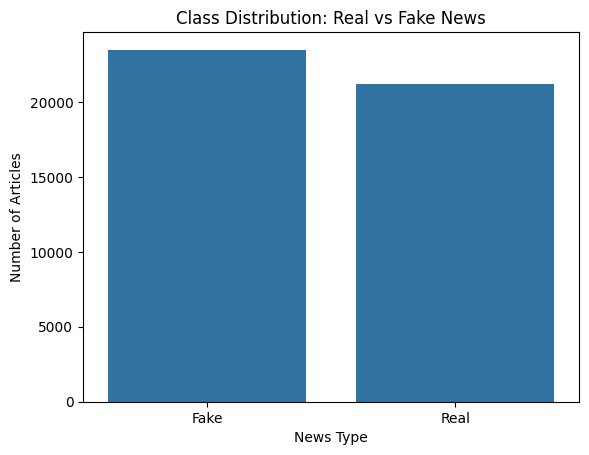

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=df)
plt.title("Class Distribution: Real vs Fake News")
plt.xticks([0,1], ['Fake', 'Real'])
plt.xlabel("News Type")
plt.ylabel("Number of Articles")
plt.show()

In [8]:
!pip install nltk

In [9]:
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
stop_words = set(stopwords.words('english'))

def clean_text(text):

  #1.Lowercase
  text = text.lower()

  #2.Remove Punctuation
  text = text.translate(str.maketrans("","",string.punctuation))

  #3.Remove numbers
  text = re.subs(r'\d+',"", text)

  #4.Tokenize
  words = word_tokenize(text)

  #5.Remove stopwords
  filtered_words = [word for word in words if word not in stop_words]

  #6.Join back to string
  return ' '.join(filtered_words)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

x = vectorizer.fit_transform(df['text'])

In [12]:
y = df['label']


In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(y)

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.25, random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [17]:
y_pred = model.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc

print("Accuracy score", accuracy_score(y_test, y_pred))
print("Precision Score", precision_score(y_test, y_pred))
print("F1 Score", f1_score(y_test, y_pred))
print("Recall Score", recall_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:", cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy score 0.9851427548554551
Precision Score 0.9819185382565664
F1 Score 0.9841663487218619
Recall Score 0.9864244741873806

Confusion Matrix: [[5848   95]
 [  71 5159]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5943
           1       0.98      0.99      0.98      5230

    accuracy                           0.99     11173
   macro avg       0.98      0.99      0.99     11173
weighted avg       0.99      0.99      0.99     11173



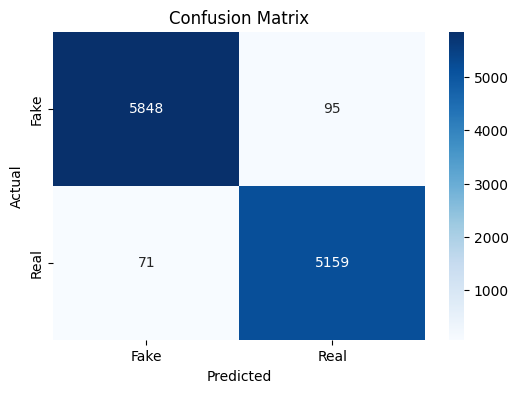

In [19]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

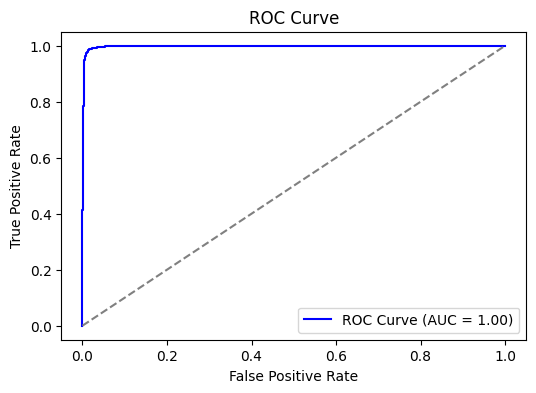

In [20]:
y_prob = model.predict_proba(x_test)[:, 1]  # Probability of being 'Real'
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [21]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)

y_pred_nb = nb_model.predict(x_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.9391389957934306

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      5943
           1       0.94      0.93      0.93      5230

    accuracy                           0.94     11173
   macro avg       0.94      0.94      0.94     11173
weighted avg       0.94      0.94      0.94     11173



In [22]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:\n", cm)


Random Forest Accuracy: 0.9864852770070707

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5943
           1       0.98      0.99      0.99      5230

    accuracy                           0.99     11173
   macro avg       0.99      0.99      0.99     11173
weighted avg       0.99      0.99      0.99     11173


Confusion Matrix:
 [[5859   84]
 [  67 5163]]


In [25]:
import joblib

joblib.dump(rf_model, "fake_news_detector.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")

# Later, load the model like this:
# loaded_model = joblib.load("fake_news_detector.pkl")
# prediction = loaded_model.predict([vectorized_text])


['vectorizer.pkl']

In [26]:
# Example text for testing
new_text = ["Breaking news: Scientists discover water on Mars!"]

new_text_vec = vectorizer.transform(new_text)

prediction = rf_model.predict(new_text_vec)
print("Prediction:", "Real" if prediction[0] == 1 else "Fake")


Prediction: Fake
